#### 5. Arbitary value imputation

It consists of replacing NAN by an arbitary value

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
def impute_nan(df,variable):
    df[variable+"_hundred"]=df[variable].fillna(100)

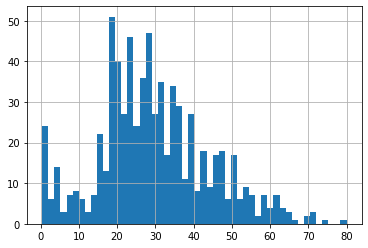

In [8]:
df['Age'].hist(bins=50)

#### advantages
1. Easy to implement
2. captures the importance of missingness if there is one
#### disadvantages
1. distorts the original distribution of the variable
2. if missingness is not important, it may mask the predictive power of the original value.
3. Hard to decide which value to use.


## How to handle categorical missing values

### 1. Frequent category imputation

In [15]:
df=pd.read_csv("loan.csv",usecols=["BsmtQual",'FireplaceQu','GarageType','SalePrice'])

In [16]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [17]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [18]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [19]:
df.isnull().mean().sort_values(ascending=True) 

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

#### Compute the frequency with every feature

In [21]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

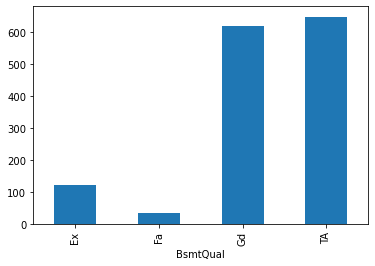

In [22]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

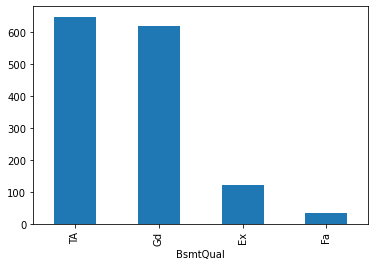

In [23]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

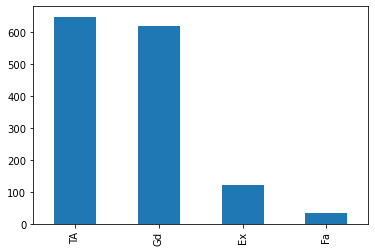

In [24]:
df['BsmtQual'].value_counts().plot.bar()

In [25]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [26]:
df['GarageType'].value_counts()[0]

870

In [31]:
df['GarageType'].value_counts().index[0] # df['GarageType'].mode()[0]

'Attchd'

In [28]:
#### Replacing function
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [29]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [30]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages
1. Easy to implement
2. faster way to implement
#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over represented way, if there are many nan's.
2. It distorts the relation of the most frequent label

### 2. Adding a variable to capture NAN

In [32]:
df=pd.read_csv("loan.csv",usecols=["BsmtQual",'FireplaceQu','GarageType','SalePrice'])

In [33]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [37]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [38]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,0,NaN,Attchd,208500,0
1,0,TA,Attchd,181500,0
2,0,TA,Attchd,223500,0
3,0,Gd,Detchd,140000,0
4,0,TA,Attchd,250000,0


In [39]:
frequent=df['BsmtQual'].mode()[0]

In [40]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [41]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,0,NaN,Attchd,208500,0
1,0,TA,Attchd,181500,0
2,0,TA,Attchd,223500,0
3,0,Gd,Detchd,140000,0
4,0,TA,Attchd,250000,0


In [42]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [43]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,0,Gd,Attchd,208500,0,1
1,0,TA,Attchd,181500,0,0
2,0,TA,Attchd,223500,0,0
3,0,Gd,Detchd,140000,0,0
4,0,TA,Attchd,250000,0,0


suppose if you have more frequent categories we replace NAN with a new category

In [44]:
df=pd.read_csv("loan.csv",usecols=["BsmtQual",'FireplaceQu','GarageType','SalePrice'])

In [45]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [48]:
def impute_nan(df,variable):
    df[variable+'newvar']=np.where(df[variable].isnull(),"missing",df[variable])

In [49]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [50]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [51]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [52]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
